In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
dataset_test = pd.read_csv(r'data\analytics vidhya\test_AbJTz2l.csv')

In [4]:
dataset_test.shape

(5681, 11)

In [5]:
dataset_test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [6]:
dataset_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
#Treating missing values

In [9]:
dataset_test['Item_Weight'] = dataset_test['Item_Weight'].fillna(dataset_test['Item_Weight'].mean())

In [10]:
dataset_test['Outlet_Size'] = dataset_test['Outlet_Size'].fillna(dataset_test['Outlet_Size'].mode()[0])

In [11]:
dataset_test['Item_Fat_Content'] = dataset_test['Item_Fat_Content'].replace('LF','Low Fat')
dataset_test['Item_Fat_Content'] = dataset_test['Item_Fat_Content'].replace('low fat','Low Fat')

In [12]:
dataset_test['Item_Fat_Content'] = dataset_test['Item_Fat_Content'].replace('reg','Regular')

In [13]:
dataset_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [14]:
dataset_test.skew()

Item_Weight                  0.142813
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

In [15]:
mean_value_1 = dataset_test['Item_Visibility'].mean(skipna=True)
dataset_test['Item_Visibility']=dataset_test.Item_Visibility.mask(dataset_test.Item_Visibility == 0,mean_value_1)

In [16]:
dataset_test['Item_Visibility'] = np.log(dataset_test['Item_Visibility'])

In [17]:
dataset_test.skew()

Item_Weight                  0.142813
Item_Visibility             -0.492067
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

array([[<AxesSubplot:title={'center':'Item_Visibility'}>]], dtype=object)

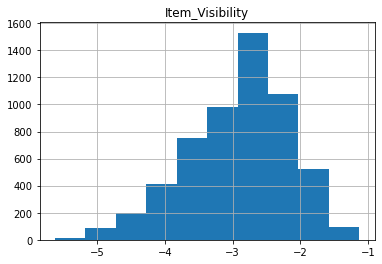

In [18]:
dataset_test.hist(column='Item_Visibility')

# Categorical Variables

In [19]:
#Dropping Item_identifier and Outlet_identifier columns 

df_test= dataset_test.copy()
df_test = df_test.drop(labels=['Item_Identifier','Outlet_Identifier'] ,axis=1 )

In [20]:
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,-4.884245,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,Regular,-3.258977,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,-2.306845,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,-4.174142,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,-2.132005,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [21]:
df_test.shape

(5681, 9)

In [22]:
categorical_features_test = [feature for feature in df_test.columns if df_test[feature].dtype=='O']

In [23]:
for col in categorical_features_test:
    print(col,':',df_test[col].nunique())

Item_Fat_Content : 2
Item_Type : 16
Outlet_Size : 3
Outlet_Location_Type : 3
Outlet_Type : 4


In [24]:
encode_data_test = pd.get_dummies(df_test[categorical_features_test],prefix=categorical_features_test)

In [25]:
encode_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Item_Fat_Content_Low Fat         5681 non-null   uint8
 1   Item_Fat_Content_Regular         5681 non-null   uint8
 2   Item_Type_Baking Goods           5681 non-null   uint8
 3   Item_Type_Breads                 5681 non-null   uint8
 4   Item_Type_Breakfast              5681 non-null   uint8
 5   Item_Type_Canned                 5681 non-null   uint8
 6   Item_Type_Dairy                  5681 non-null   uint8
 7   Item_Type_Frozen Foods           5681 non-null   uint8
 8   Item_Type_Fruits and Vegetables  5681 non-null   uint8
 9   Item_Type_Hard Drinks            5681 non-null   uint8
 10  Item_Type_Health and Hygiene     5681 non-null   uint8
 11  Item_Type_Household              5681 non-null   uint8
 12  Item_Type_Meat                   5681 non-null  

In [26]:
df_test.drop(categorical_features_test, axis=1, inplace = True)

In [27]:
df_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750000,-4.884245,107.8622,1999
1,8.300000,-3.258977,87.3198,2007
2,14.600000,-2.306845,241.7538,1998
3,7.315000,-4.174142,155.0340,2007
4,12.695633,-2.132005,234.2300,1985
...,...,...,...,...
5676,10.500000,-4.305327,141.3154,1997
5677,7.600000,-1.944974,169.1448,2009
5678,10.000000,-2.610081,118.7440,2002
5679,15.300000,-2.722902,214.6218,2007


In [28]:
df_test = pd.concat([df_test, encode_data_test],axis=1)

# Scaling values using standard scaler

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_test = sc.fit_transform(df_test)

In [30]:
pd.DataFrame(df_test).to_csv(r'C:\Users\Praneeth Kalluri\Desktop\Manasa\analytics vidhya\df_formulated_test.csv', index=False)